In [128]:
import warnings
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sb

warnings.filterwarnings('ignore')

### Karakteristikat
- enrollee_id: Id unike e kandidateve
- city: Kodi i qytetit
- city_ development _index: Indeksi i qytetit (scaled)
- gender: Gjinia e kandidatit 
- relevent_experience: Eksperienca e kandidatit ne lidhja me Data Science
- enrolled_university: Lloji i lendeve universtare te ndjekura (nese ka)
- education_level: Niveli i edukimit te kandidatit
- major_discipline: Lloji i edukimit te kandidatit
- experience: Totali i eksperiences ne vite
- company_size: Numri i punetoreve ne kompanine aktuale te kandidatit
- company_type: Lloji i punedhenesit aktual
- lastnewjob: Diferenca ndermjet punes se meparshme dhe punes aktuale (ne vite)
- training_hours: oret e trajnimit
- target: 0 – Nuk po kerkon te nderroj punen, 1 – Po kerkon te nderroj punen

In [129]:
df_train=pd.read_csv("C:/Users/puhiz/Desktop/Fakultet/Machine_learning/Data/aug_train.csv")

df_train.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [130]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [131]:
print(df_train.shape)
print(df_train['relevent_experience'].unique())
print(df_train['enrolled_university'].unique())
print(df_train['education_level'].unique())
print(df_train['major_discipline'].unique())
print(df_train['experience'].unique())
print(df_train['company_size'].unique())
print(df_train['company_type'].unique())
print(df_train['last_new_job'].unique())

(19158, 14)
['Has relevent experience' 'No relevent experience']
['no_enrollment' 'Full time course' nan 'Part time course']
['Graduate' 'Masters' 'High School' nan 'Phd' 'Primary School']
['STEM' 'Business Degree' nan 'Arts' 'Humanities' 'No Major' 'Other']
['>20' '15' '5' '<1' '11' '13' '7' '17' '2' '16' '1' '4' '10' '14' '18'
 '19' '12' '3' '6' '9' '8' '20' nan]
[nan '50-99' '<10' '10000+' '5000-9999' '1000-4999' '10/49' '100-500'
 '500-999']
[nan 'Pvt Ltd' 'Funded Startup' 'Early Stage Startup' 'Other'
 'Public Sector' 'NGO']
['1' '>4' 'never' '4' '3' '2' nan]


In [132]:
df_train['company_size'] = df_train['company_size'].replace('10/49', '10-49')
df_train['company_size'].value_counts()

50-99        3083
100-500      2571
10000+       2019
10-49        1471
1000-4999    1328
<10          1308
500-999       877
5000-9999     563
Name: company_size, dtype: int64

In [133]:
df_train.describe()

,enrollee_id,city_development_index,training_hours,target
count,19158.000000,19158.000000,19158.000000,19158.000000
mean,16875.358179,0.828848,65.366896,0.249348
std,9616.292592,0.123362,60.058462,0.432647
min,1.000000,0.448000,1.000000,0.000000
25%,8554.250000,0.740000,23.000000,0.000000
50%,16982.500000,0.903000,47.000000,0.000000
75%,25169.750000,0.920000,88.000000,0.000000
max,33380.000000,0.949000,336.000000,1.000000



Dataseti permban 19158 te dhena dhe 14 kolona. Jane 4 variabla numerike dhe 10 variable kategorike

In [134]:
print(df_train.shape)
print(df_train.columns.to_list())

(19158, 14)
['enrollee_id', 'city', 'city_development_index', 'gender', 'relevent_experience', 'enrolled_university', 'education_level', 'major_discipline', 'experience', 'company_size', 'company_type', 'last_new_job', 'training_hours', 'target']


Numri i rreshtave qe ju mungojne se paku nje vlere

In [135]:
x = df_train.dropna()
total = df_train.shape[0]
missing = x.shape[0]
print('Numri i rreshtave:' ,  missing )
print('Perqindja e rreshtave qe permbajne vlera qe mungojne:', (missing ) *100 / total )

Numri i rreshtave: 8955
Perqindja e rreshtave qe permbajne vlera qe mungojne: 46.74287503914814


Perqindja e rreshtave qe permbajne vlera qe mungojne eshte shume i larte prandaj nuk mund te i largojme keto te dhena.
Ne vazhdim do te tregohen vlerat e munguara ne secilen kolone.

In [136]:
null = pd.DataFrame({'No of null values': df_train.isnull().sum(),'Percentage of null values':df_train.isnull().sum()*100/df_train.shape[0]})
null

,No of null values,Percentage of null values
enrollee_id,0,0.000000
city,0,0.000000
city_development_index,0,0.000000
gender,4508,23.530640
relevent_experience,0,0.000000
enrolled_university,386,2.014824
education_level,460,2.401086
major_discipline,2813,14.683161
experience,65,0.339284
company_size,5938,30.994885


Kolonat qe permbajne vlera te munguara.

In [137]:
null[null['No of null values'] > 0]

,No of null values,Percentage of null values
gender,4508,23.530640
enrolled_university,386,2.014824
education_level,460,2.401086
major_discipline,2813,14.683161
experience,65,0.339284
company_size,5938,30.994885
company_type,6140,32.049274
last_new_job,423,2.207955


endrollee_id nuk eshte kolone e cila na ndihmon prandaj e largojme.

In [138]:
df_train.drop(['enrollee_id'], axis = 1, inplace=True)
df_train.shape

(19158, 13)

## Target

Target ka 2 vlera:

0 - personat qe duan te nderrojne punen

1 - personat qe nuk duan te nderrojne punen

0.0    14381
1.0     4777
Name: target, dtype: int64


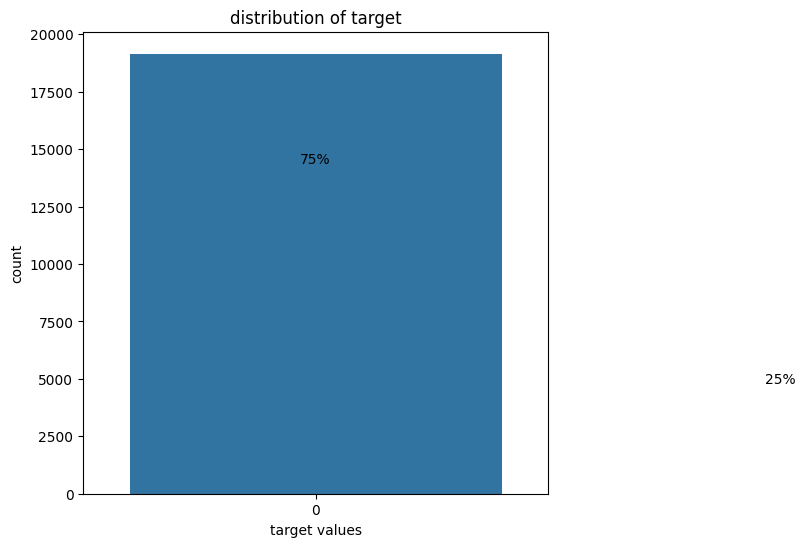

In [139]:
count = df_train.target.value_counts()
print( count )
plt.figure(figsize = (6,6))
sb.countplot(df_train.target,color = sb.color_palette()[0])
plt.title('distribution of target')
plt.xlabel('target values')
plt.ylabel('count')
for i in range(count.shape[0]):
    plt.text( 
            i,
            count[i] + 500,
            str(round(100*count[i] /df_train.target.count()))+'%',
              ha='center',
              va = 'top')

Dallohet se te dhenat jane te pabalancuara

## Training hours

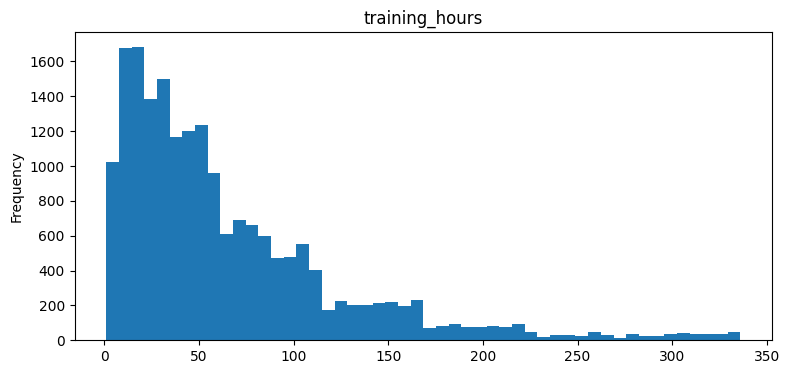

In [140]:
plt.figure(figsize=(9,4))
plt.hist(df_train["training_hours"], color= sb.color_palette()[0] ,bins=50)
plt.ylabel("Frequency")
plt.title('training_hours')
plt.show()

Dallohet se shperndarja e te dhenave per Training Hours anon nga e djathta.

In [141]:
IQR = df_train[['training_hours']].quantile(0.75) - df_train[['training_hours']].quantile(0.25)


lower_boundary = df_train[['training_hours']].quantile(0.25) - (IQR * 1.5)
upper_boundary = df_train[['training_hours']].quantile(0.75) + (IQR * 1.5)
print('city_development_index Lower outliers = ',df_train.loc[(df_train['training_hours']<lower_boundary[0])].shape[0])
print('city_development_index Upper outliers = ',df_train.loc[(df_train['training_hours']>upper_boundary[0])].shape[0])

city_development_index Lower outliers =  0
city_development_index Upper outliers =  984


## City development index

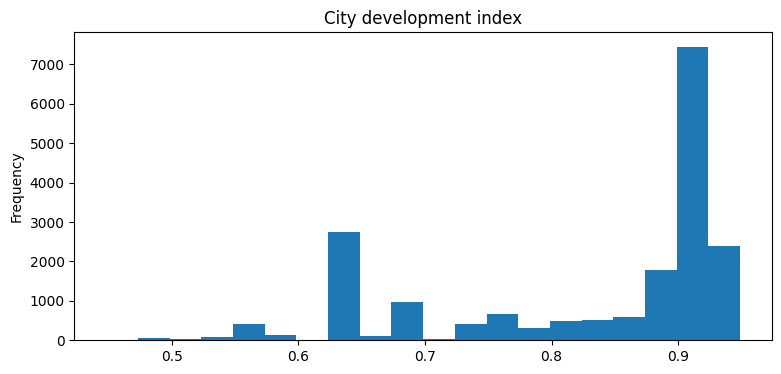

In [142]:
plt.figure(figsize=(9,4))
plt.hist(df_train["city_development_index"], color= sb.color_palette()[0] ,bins=20)
plt.ylabel("Frequency")
plt.title('City development index')
plt.show()

array([[<AxesSubplot: title={'center': '0'}>]], dtype=object)

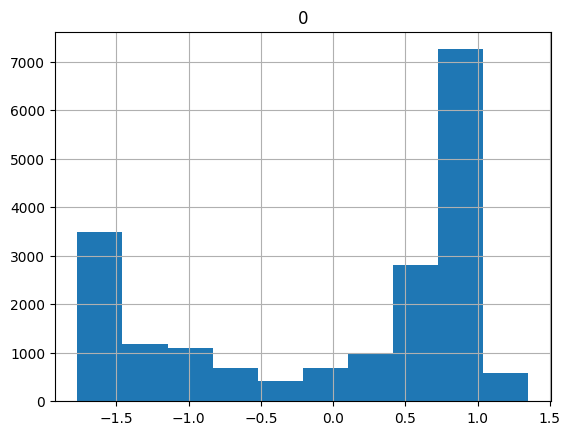

In [143]:
#transformimi

from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='box-cox')
pt.fit(df_train['city_development_index'].values.reshape(-1,1))
tr = pt.transform(df_train['city_development_index'].values.reshape(-1,1))
df_train['city_development_index'] = pd.DataFrame(tr)
pd.DataFrame(tr).hist()

## Gender

In [144]:
df=pd.read_csv("C:/Users/puhiz/Desktop/Fakultet/Machine_learning/Data/aug_train.csv")
count = df.gender.value_counts()
print( count )

Male      13221
Female     1238
Other       191
Name: gender, dtype: int64


## Relevant Experience

In [145]:
count = df.relevent_experience.value_counts()
print( count )

Has relevent experience    13792
No relevent experience      5366
Name: relevent_experience, dtype: int64


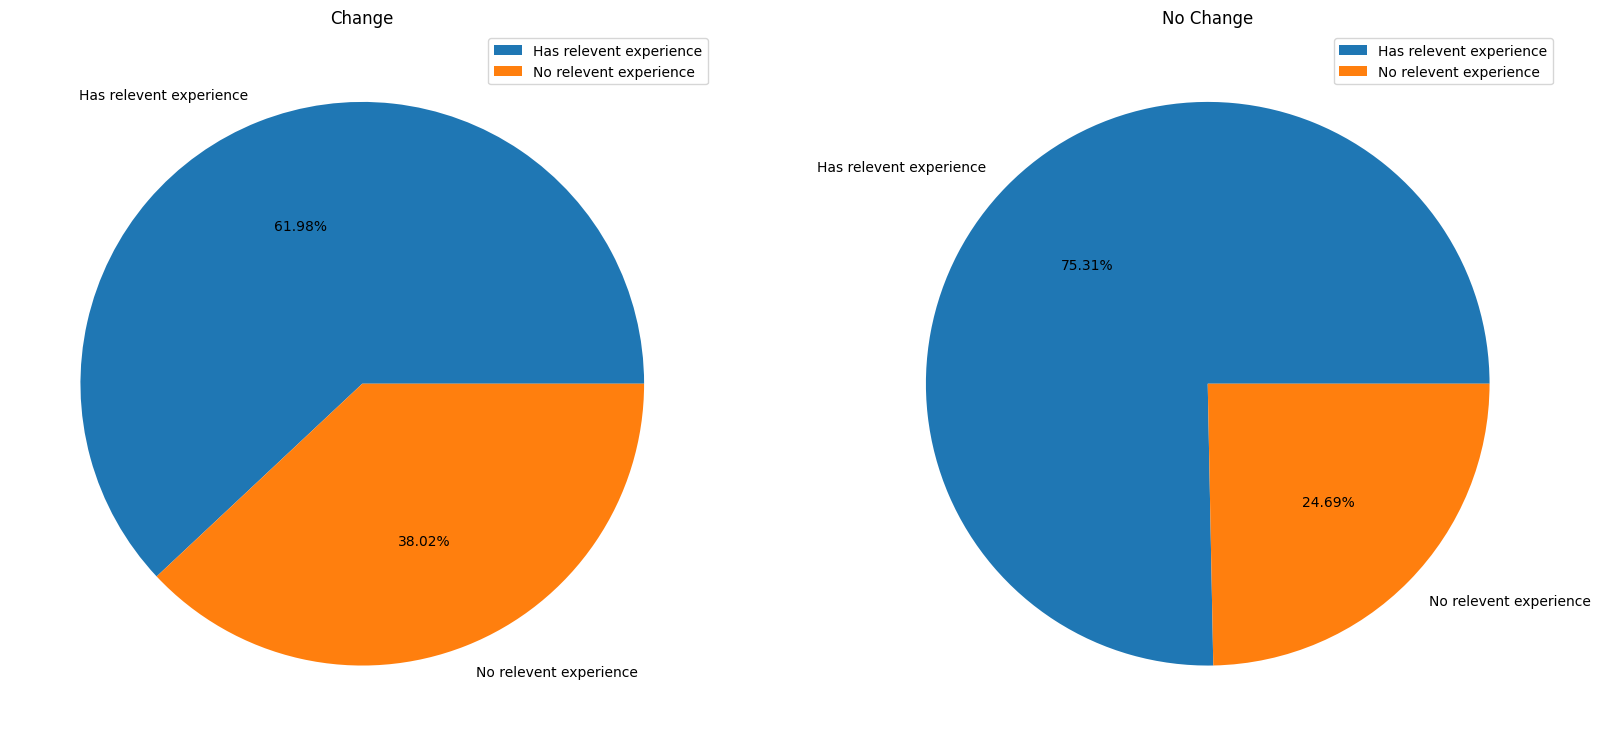

In [146]:
change = df[df.target == 1].relevent_experience.value_counts()
no_change = df[df.target == 0].relevent_experience.value_counts()
plt.figure(figsize=(20,20))
plt.subplot(1,2,1)
plt.pie(change,autopct='%1.2f%%',labels=change.index)
plt.legend()
plt.title('Change')
plt.subplot(1,2,2)
plt.pie(no_change,autopct='%1.2f%%',labels=no_change.index)
plt.legend()
plt.title('No Change')
plt.show()

## Education Level

In [147]:
count = df.education_level.value_counts()
print(count)

Graduate          11598
Masters            4361
High School        2017
Phd                 414
Primary School      308
Name: education_level, dtype: int64


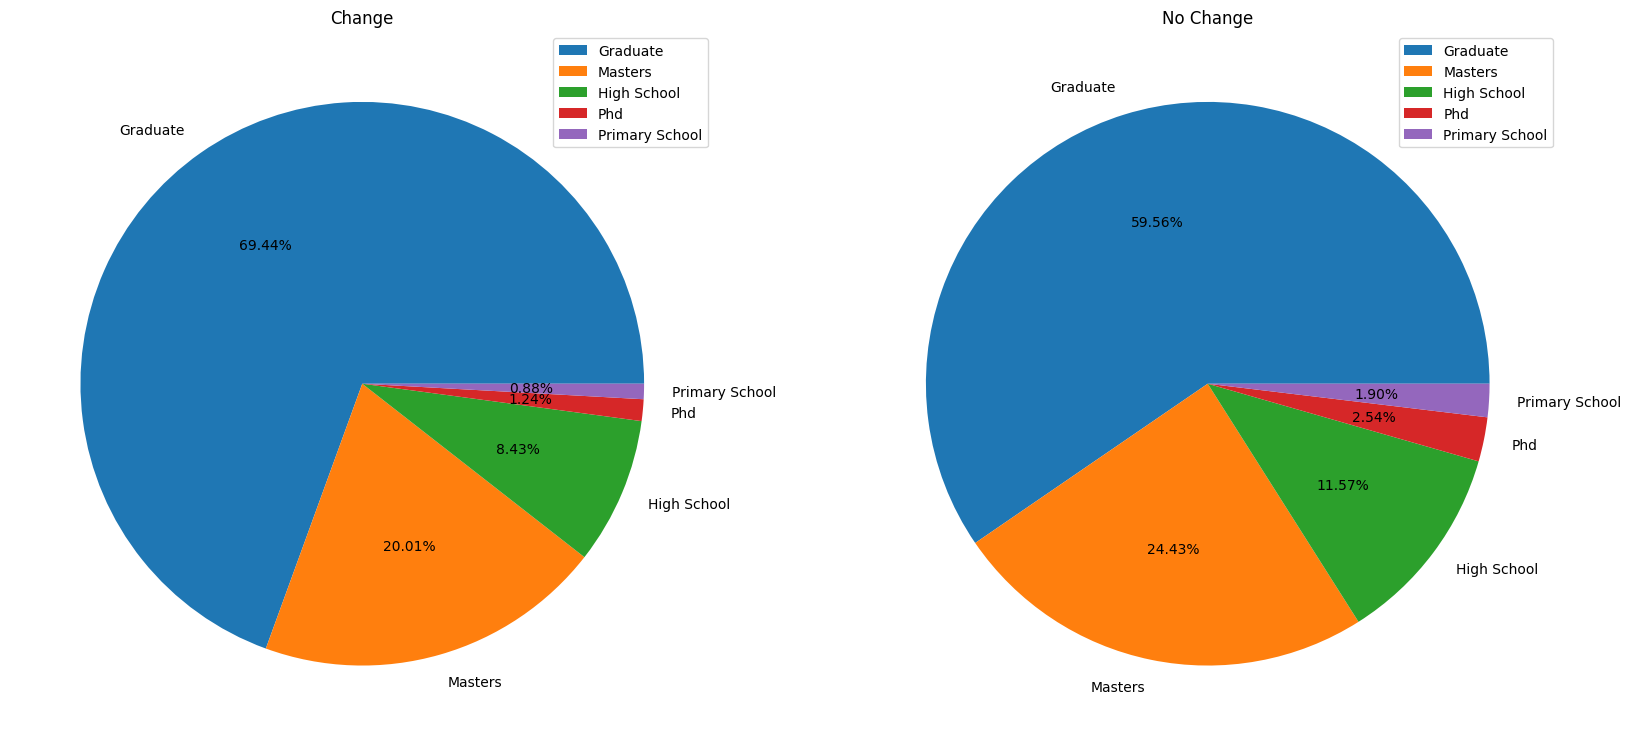

In [148]:
change = df[df.target == 1].education_level.value_counts()
no_change = df[df.target == 0].education_level.value_counts()
plt.figure(figsize=(20,20))
plt.subplot(1,2,1)
plt.pie(change,autopct='%1.2f%%',labels=change.index)
plt.legend()
plt.title('Change')
plt.subplot(1,2,2)
plt.pie(no_change,autopct='%1.2f%%',labels=no_change.index)
plt.legend()
plt.title('No Change')
plt.show()

## Major Discipline

In [149]:
count = df.major_discipline.value_counts()
print(count)

STEM               14492
Humanities           669
Other                381
Business Degree      327
Arts                 253
No Major             223
Name: major_discipline, dtype: int64


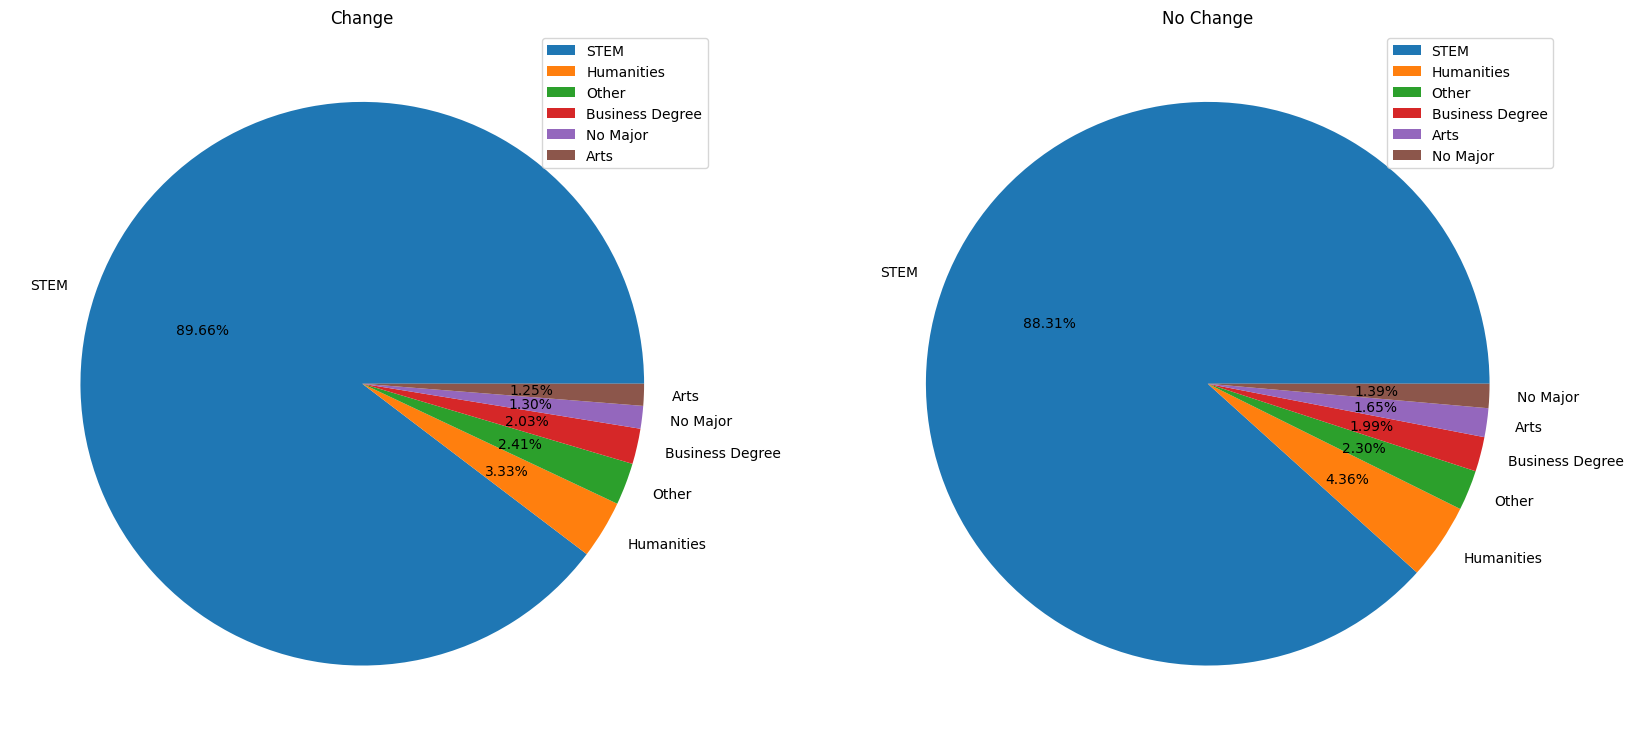

In [150]:
change = df[df.target == 1].major_discipline.value_counts()
no_change = df[df.target == 0].major_discipline.value_counts()
plt.figure(figsize=(20,20))
plt.subplot(1,2,1)
plt.pie(change,autopct='%1.2f%%',labels=change.index)
plt.legend()
plt.title('Change')
plt.subplot(1,2,2)
plt.pie(no_change,autopct='%1.2f%%',labels=no_change.index)
plt.legend()
plt.title('No Change')
plt.show()

## Experience

In [151]:
df_train['experience'].value_counts()

>20    3286
5      1430
4      1403
3      1354
6      1216
2      1127
7      1028
10      985
9       980
8       802
15      686
11      664
14      586
1       549
<1      522
16      508
12      494
13      399
17      342
19      304
18      280
20      148
Name: experience, dtype: int64

Ka shume lloje te kategorive, prandaj i transformojme ne 6

In [152]:
df_train['experience'].replace({'1':'1-5',
                                '2':'1-5',
                                '3':'1-5',
                                '4':'1-5',
                                '5':'1-5',
                                '6':'6-10',
                                '7':'6-10',
                                '8':'6-10',
                                '9':'6-10',
                                '10':'6-10',
                                '11':'11-15',
                                '12':'11-15',
                                '13':'11-15',
                                '14':'11-15',
                                '15':'11-15',
                                '16':'16-20',
                                '17':'16-20',
                                '18':'16-20',
                                '19':'16-20',
                                '20':'16-20'},inplace=True)

count = df_train.experience.value_counts()
count

1-5      5863
6-10     5011
>20      3286
11-15    2829
16-20    1582
<1        522
Name: experience, dtype: int64

In [153]:
count = df_train.experience.value_counts()
print(count)

1-5      5863
6-10     5011
>20      3286
11-15    2829
16-20    1582
<1        522
Name: experience, dtype: int64


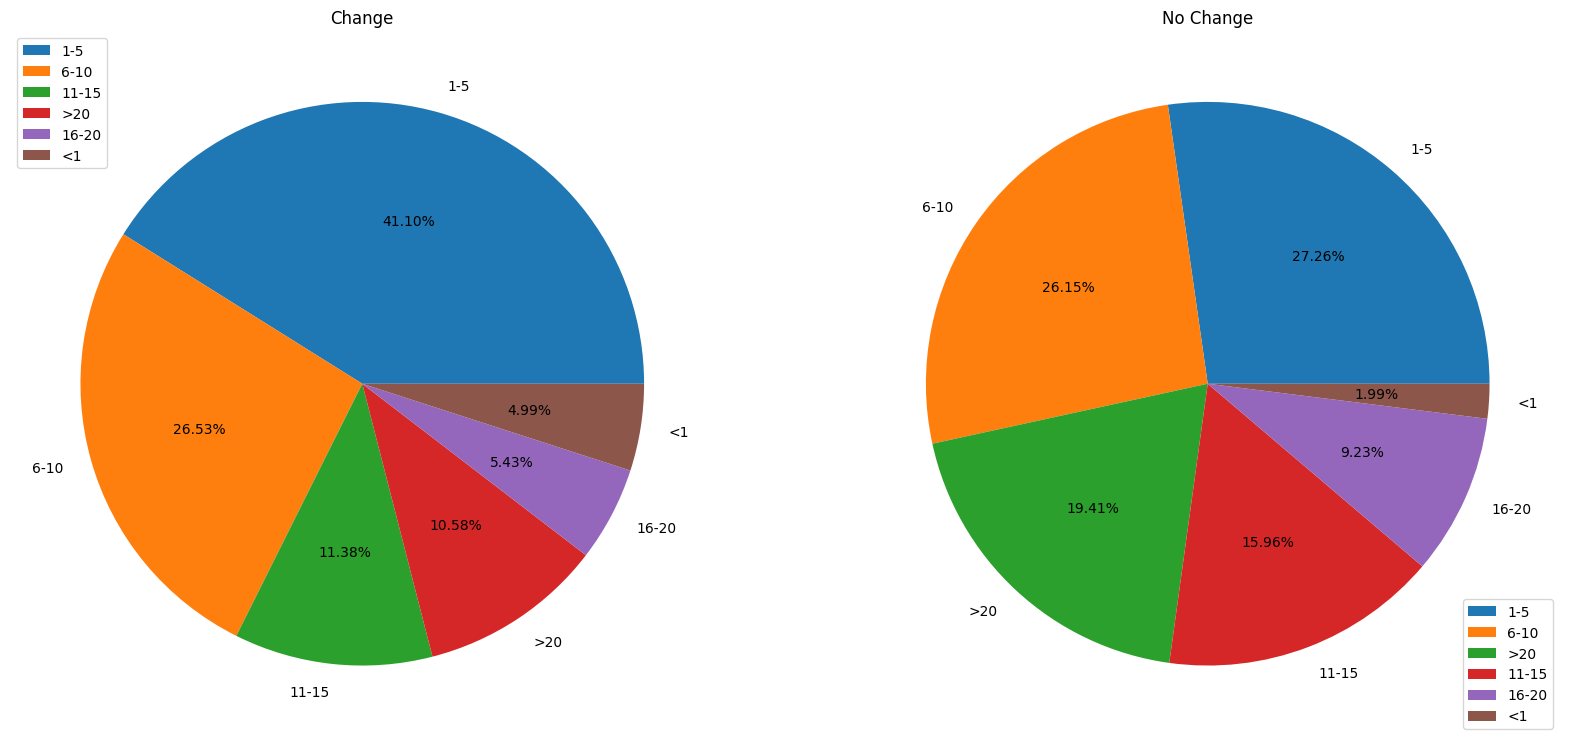

In [154]:
change = df_train[df_train.target == 1].experience.value_counts()
no_change = df_train[df_train.target == 0].experience.value_counts()
plt.figure(figsize=(20,20))
plt.subplot(1,2,1)
plt.pie(change,autopct='%1.2f%%',labels=change.index)
plt.legend()
plt.title('Change')
plt.subplot(1,2,2)
plt.pie(no_change,autopct='%1.2f%%',labels=no_change.index)
plt.legend()
plt.title('No Change')
plt.show()